In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Private-Room.csv')
df.head(5)

Unnamed: 0.1  Unnamed: 0                           listing_url  \
0             5           5   https://www.airbnb.com/rooms/131610   
1             7           7   https://www.airbnb.com/rooms/171109   
2            10          10  https://www.airbnb.com/rooms/1013504   
3            11          11  https://www.airbnb.com/rooms/1051636   
4            12          12  https://www.airbnb.com/rooms/1066945   

  last_scraped                                        description  \
0   2024-09-26                            No contiene descripción   
1   2024-09-25  Stay in a private room 2 blocks away from WTC,...   
2   2024-09-25  Private room (single bed) with private  bathro...   
3   2024-09-26  Like home! Private room in charming, tasteful ...   
4   2024-09-25  In front of the Frida Kahlo Museum.<br /> Priv...   

                                     host_url  host_since  host_response_time  \
0    https://www.airbnb.com/users/show/647454  2011-05-31      within an hour   
1    https://www.airbnb.com/users/show/816295  2011-07-13  within a few hours   
2   https://www.airbnb.com/users/show/1664327  2012-01-28      within an hour   
3  https://www.airbnb.com/users/show/22366411  2014-10-10      within an hour   
4   https://www.airbnb.com/users/show/5870021  2013-04-10      within an hour   

               host_response_rate              host_acceptance_rate  ...  \
0  No contiene host_response_rate  No contiene host_acceptance_rate  ...   
1                            100%                               78%  ...   
2                            100%                              100%  ...   
3  No contiene host_response_rate  No contiene host_acceptance_rate  ...   
4                            100%                               75%  ...   

  review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                   4.79                      4.76                  4.84   
1                   4.87                      4.86                  4.98   
2                   4.90                      4.92                  4.92   
3                   4.88                      4.97                  4.97   
4                   4.94                      4.97                  4.96   

  review_scores_communication review_scores_location  \
0                        4.83                   4.85   
1                        4.95                   4.97   
2                        4.94                   4.92   
3                        4.77                   4.93   
4                        4.91                   4.97   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                            3.0                                         1.0   
1                            2.0                                         0.0   
2                            2.0                                         0.0   
3                            1.0                                         0.0   
4                            5.0                                         0.0   

  calculated_host_listings_count_private_rooms  \
0                                          2.0   
1                                          2.0   
2                                          2.0   
3                                          1.0   
4                                          5.0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                         0.0              1.74  
1                                         0.0              0.84  
2                                         0.0              0.54  
3                                         0.0              0.22  
4                                         0.0              1.15  

[5 rows x 52 columns]

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

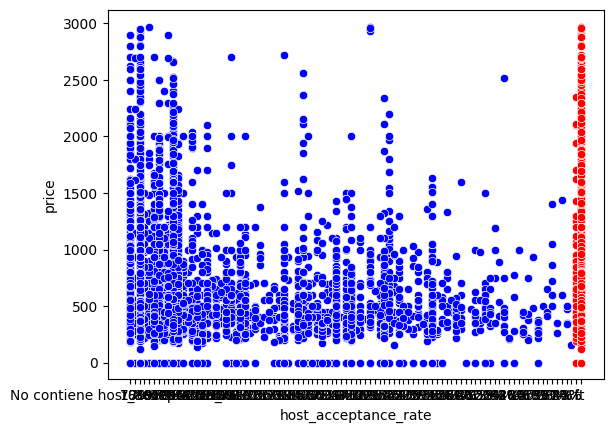

In [4]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [5]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
type(model)

sklearn.linear_model._base.LinearRegression

In [8]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No contiene host_acceptance_rate", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

float64


LinearRegression()

In [9]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([233.05105446]),
 'rank_': 1,
 'singular_': array([37.49676933]),
 'intercept_': 397.56914570538805}

In [10]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0401176366050261

In [11]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([397.56914571, 579.34896819, 630.62020017, ..., 630.62020017,
       630.62020017, 630.62020017])

In [12]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones  Unnamed: 0.1  Unnamed: 0  \
0       397.569146             5           5   
1       579.348968             7           7   
2       630.620200            10          10   
3       397.569146            11          11   
4       572.357437            12          12   
...            ...           ...         ...   
8688    397.569146         26576       26576   
8689    630.620200         26577       26577   
8690    630.620200         26578       26578   
8691    630.620200         26579       26579   
8692    630.620200         26580       26580   

                                           listing_url last_scraped  \
0                  https://www.airbnb.com/rooms/131610   2024-09-26   
1                  https://www.airbnb.com/rooms/171109   2024-09-25   
2                 https://www.airbnb.com/rooms/1013504   2024-09-25   
3                 https://www.airbnb.com/rooms/1051636   2024-09-26   
4                 https://www.airbnb.com/rooms/1066945   2024-09-25   
...                                                ...          ...   
8688  https://www.airbnb.com/rooms/1251897198681126075   2024-09-25   
8689  https://www.airbnb.com/rooms/1252141718111439700   2024-09-25   
8690  https://www.airbnb.com/rooms/1252159821531694005   2024-09-25   
8691  https://www.airbnb.com/rooms/1252185591721328995   2024-09-25   
8692  https://www.airbnb.com/rooms/1252218347521498445   2024-09-25   

                                            description  \
0                               No contiene descripción   
1     Stay in a private room 2 blocks away from WTC,...   
2     Private room (single bed) with private  bathro...   
3     Like home! Private room in charming, tasteful ...   
4     In front of the Frida Kahlo Museum.<br /> Priv...   
...                                                 ...   
8688  This accommodation is very well located, if yo...   
8689  Experience Mexico City in this delightful retr...   
8690  This spacious room features a plush king-size ...   
8691  Discover the essence of luxury in our king-siz...   
8692  Welcome to your refuge in the heart of Polanco...   

                                         host_url  host_since  \
0        https://www.airbnb.com/users/show/647454  2011-05-31   
1        https://www.airbnb.com/users/show/816295  2011-07-13   
2       https://www.airbnb.com/users/show/1664327  2012-01-28   
3      https://www.airbnb.com/users/show/22366411  2014-10-10   
4       https://www.airbnb.com/users/show/5870021  2013-04-10   
...                                           ...         ...   
8688  https://www.airbnb.com/users/show/546574784  2023-11-15   
8689   https://www.airbnb.com/users/show/67472234  2016-04-16   
8690  https://www.airbnb.com/users/show/596009321  2024-08-13   
8691  https://www.airbnb.com/users/show/596009321  2024-08-13   
8692  https://www.airbnb.com/users/show/596009321  2024-08-13   

      host_response_time              host_response_rate  ...  \
0         within an hour  No contiene host_response_rate  ...   
1     within a few hours                            100%  ...   
2         within an hour                            100%  ...   
3         within an hour  No contiene host_response_rate  ...   
4         within an hour                            100%  ...   
...                  ...                             ...  ...   
8688      within an hour  No contiene host_response_rate  ...   
8689      within an hour                            100%  ...   
8690      within an hour                            100%  ...   
8691      within an hour                            100%  ...   
8692      within an hour                            100%  ...   

      review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                       4.79                      4.76                  4.84   
1                       4.87                      4.86                  4.98   
2                       4.90                      4.92           

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

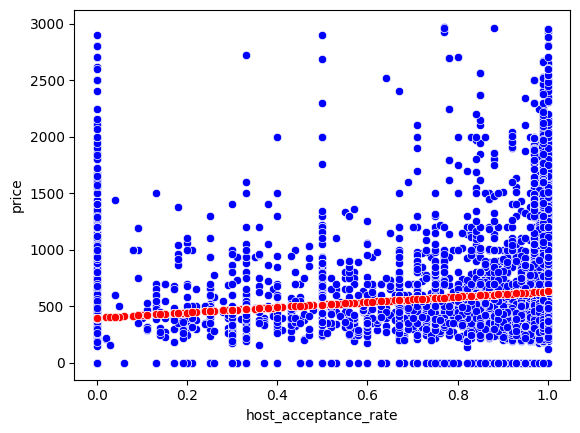

In [13]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='red',data = df)

In [14]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0401176366050261

In [15]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.20029387560538664

In [16]:
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


C:\Users\joker\AppData\Local\Temp\ipykernel_10400\68322890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


In [17]:
df['room_type'] = 2

In [18]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

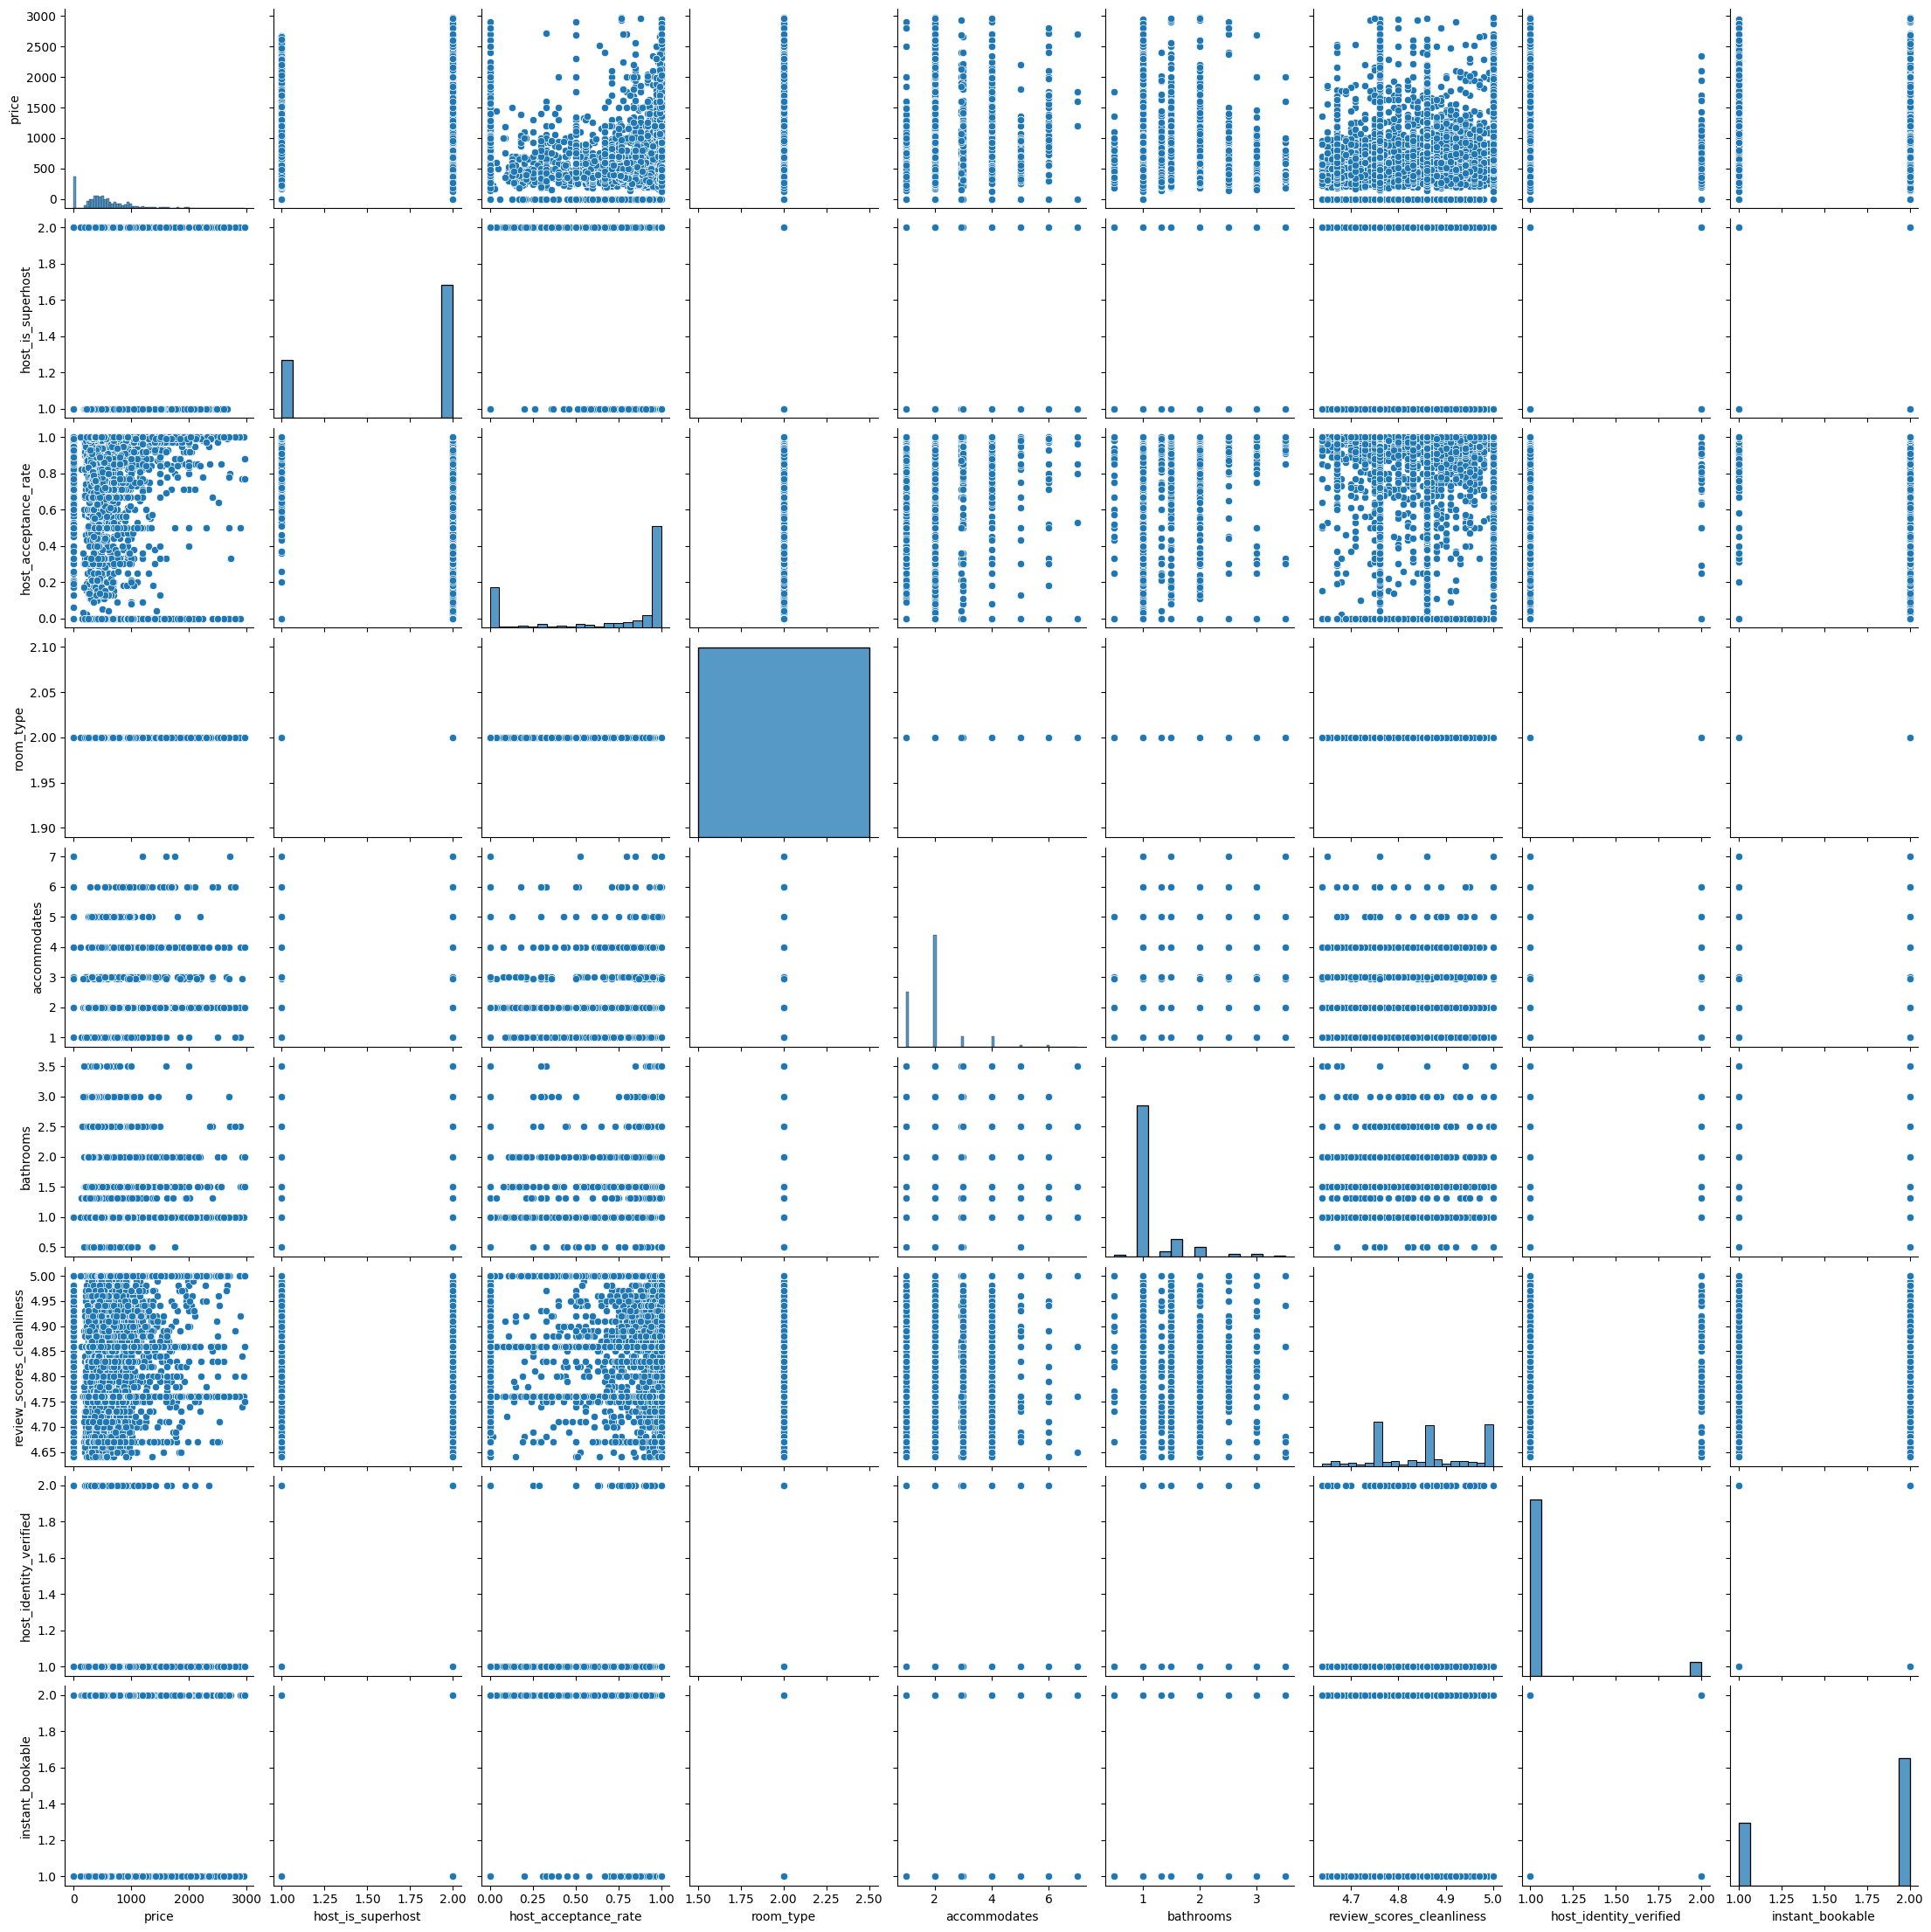

In [19]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [20]:
# Calcular nuevamente las correlaciones
Corr_Factors = df.corr()
Corr_Factors

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000          -0.083595              0.200294   
host_is_superhost         -0.083595           1.000000             -0.397119   
host_acceptance_rate       0.200294          -0.397119              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates               0.237094          -0.000999              0.105924   
bathrooms                  0.057663          -0.005566              0.044388   
review_scores_cleanliness  0.042566          -0.129708              0.118066   
host_identity_verified    -0.269872           0.165281             -0.390945   
instant_bookable          -0.197584           0.062411             -0.348277   

                           room_type  accommodates  bathrooms  \
price                            NaN      0.237094   0.057663   
host_is_superhost                NaN     -0.000999  -0.005566   
host_acceptance_rate             NaN      0.105924   0.044388   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.073143   
bathrooms                        NaN      0.073143   1.000000   
review_scores_cleanliness        NaN     -0.015434  -0.023302   
host_identity_verified           NaN     -0.043593  -0.075636   
instant_bookable                 NaN     -0.134357  -0.014236   

                           review_scores_cleanliness  host_identity_verified  \
price                                       0.042566               -0.269872   
host_is_superhost                          -0.129708                0.165281   
host_acceptance_rate                        0.118066               -0.390945   
room_type                                        NaN                     NaN   
accommodates                               -0.015434               -0.043593   
bathrooms                                  -0.023302               -0.075636   
review_scores_cleanliness                   1.000000               -0.077223   
host_identity_verified                     -0.077223                1.000000   
instant_bookable                            0.064730                0.165735   

                           instant_bookable  
price                             -0.197584  
host_is_superhost                  0.062411  
host_acceptance_rate              -0.348277  
room_type                               NaN  
accommodates                      -0.134357  
bathrooms                         -0.014236  
review_scores_cleanliness          0.064730  
host_identity_verified             0.165735  
instant_bookable                   1.000000

In [21]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000           0.083595              0.200294   
host_is_superhost          0.083595           1.000000              0.397119   
host_acceptance_rate       0.200294           0.397119              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates               0.237094           0.000999              0.105924   
bathrooms                  0.057663           0.005566              0.044388   
review_scores_cleanliness  0.042566           0.129708              0.118066   
host_identity_verified     0.269872           0.165281              0.390945   
instant_bookable           0.197584           0.062411              0.348277   

                           room_type  accommodates  bathrooms  \
price                            NaN      0.237094   0.057663   
host_is_superhost                NaN      0.000999   0.005566   
host_acceptance_rate             NaN      0.105924   0.044388   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.073143   
bathrooms                        NaN      0.073143   1.000000   
review_scores_cleanliness        NaN      0.015434   0.023302   
host_identity_verified           NaN      0.043593   0.075636   
instant_bookable                 NaN      0.134357   0.014236   

                           review_scores_cleanliness  host_identity_verified  \
price                                       0.042566                0.269872   
host_is_superhost                           0.129708                0.165281   
host_acceptance_rate                        0.118066                0.390945   
room_type                                        NaN                     NaN   
accommodates                                0.015434                0.043593   
bathrooms                                   0.023302                0.075636   
review_scores_cleanliness                   1.000000                0.077223   
host_identity_verified                      0.077223                1.000000   
instant_bookable                            0.064730                0.165735   

                           instant_bookable  
price                              0.197584  
host_is_superhost                  0.062411  
host_acceptance_rate               0.348277  
room_type                               NaN  
accommodates                       0.134357  
bathrooms                          0.014236  
review_scores_cleanliness          0.064730  
host_identity_verified             0.165735  
instant_bookable                   1.000000

C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

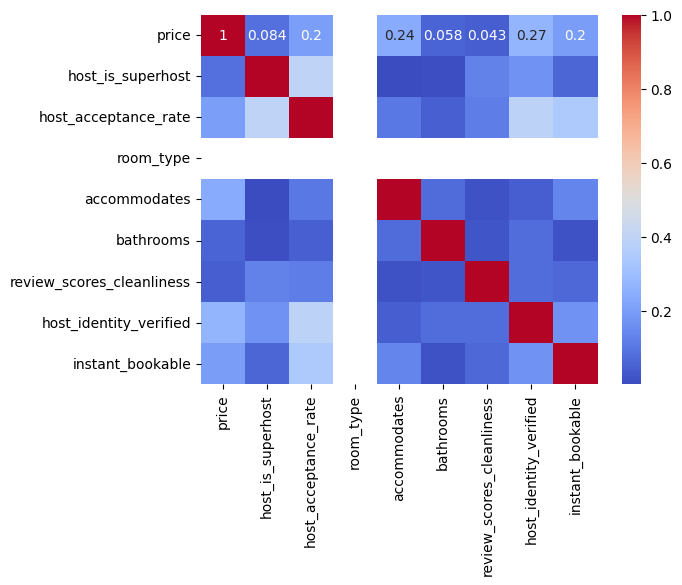

In [22]:
#Mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, annot=True, cmap='coolwarm')
Heat_Map

C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


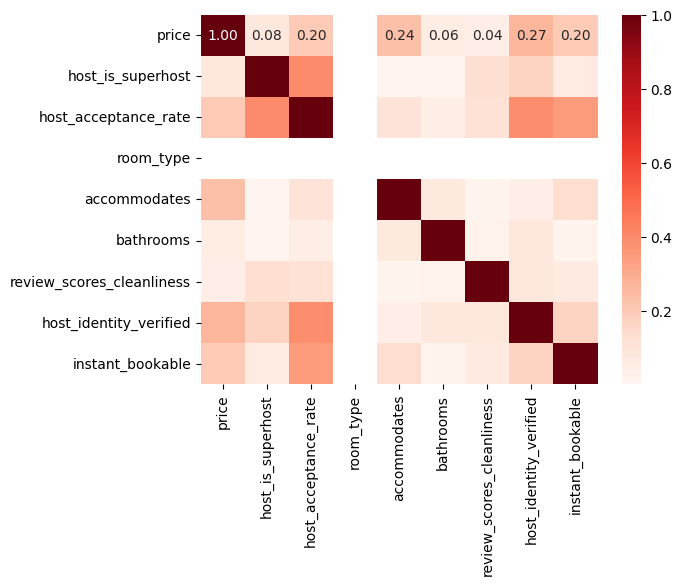

In [23]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Reds', annot=True, fmt=".2f")

Price Vs Host is Superhost

<Axes: xlabel='host_is_superhost', ylabel='price'>

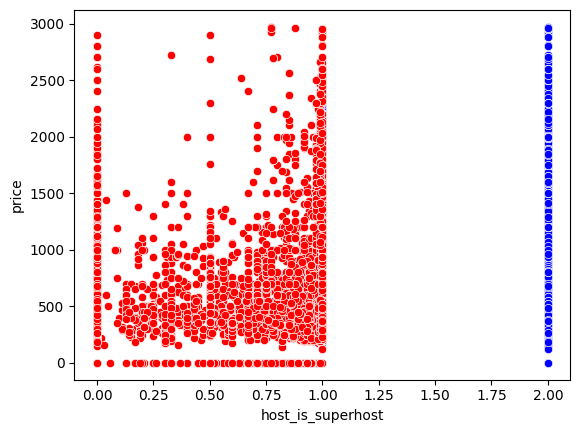

In [24]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

In [25]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [28]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-85.21271895]),
 'rank_': 1,
 'singular_': array([42.80117033]),
 'intercept_': 706.8290299261769}

In [29]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.006988204856237301

In [30]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([536.40359203, 621.61631098, 621.61631098, ..., 536.40359203,
       536.40359203, 536.40359203])

In [31]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones   price  host_is_superhost  host_acceptance_rate  \
0       536.403592     0.0                  2                  0.00   
1       621.616311   335.0                  1                  0.78   
2       621.616311   384.0                  1                  1.00   
3       536.403592   947.0                  2                  0.00   
4       536.403592  1200.0                  2                  0.75   
...            ...     ...                ...                   ...   
8688    536.403592   262.0                  2                  0.00   
8689    621.616311   488.0                  1                  1.00   
8690    536.403592  2800.0                  2                  1.00   
8691    536.403592  2700.0                  2                  1.00   
8692    536.403592  2600.0                  2                  1.00   

      room_type  accommodates  bathrooms  review_scores_cleanliness  \
0             2           2.0        1.0                       4.76   
1             2           2.0        1.0                       4.86   
2             2           1.0        1.5                       4.92   
3             2           1.0        1.0                       4.97   
4             2           2.0        1.0                       4.97   
...         ...           ...        ...                        ...   
8688          2           2.0        2.0                       4.76   
8689          2           4.0        1.0                       4.76   
8690          2           2.0        1.0                       4.76   
8691          2           2.0        1.0                       4.76   
8692          2           2.0        1.0                       4.76   

      host_identity_verified  instant_bookable  
0                          2                 2  
1                          1                 2  
2                          1                 2  
3                          2                 2  
4                          1                 2  
...                      ...               ...  
8688                       1                 1  
8689                       1                 1  
8690                       1                 1  
8691                       1                 1  
8692                       1                 1  

[8693 rows x 10 columns]

<Axes: xlabel='host_is_superhost', ylabel='price'>

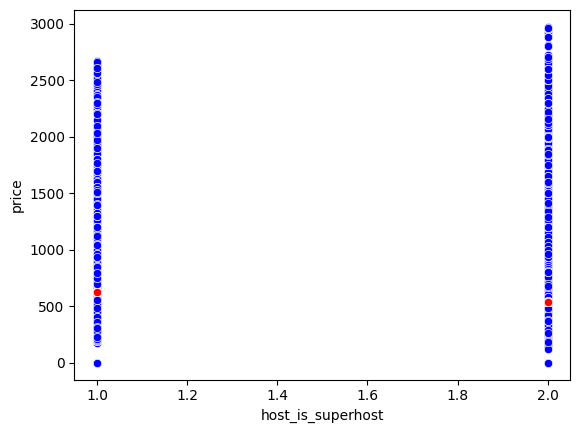

In [32]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_is_superhost',y='price',color='blue',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones',color='red',data = df)

In [33]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.006988204856237301

In [34]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.08359548346793205

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

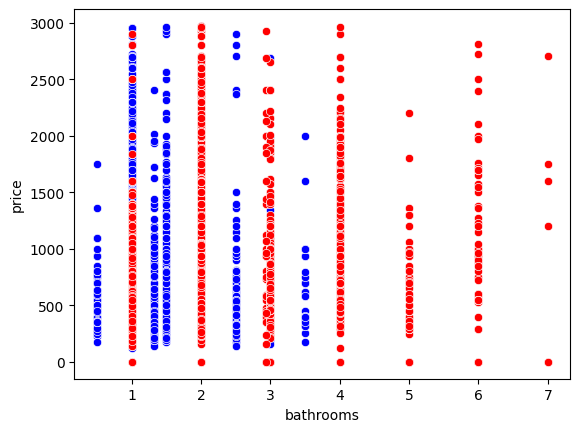

In [35]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='blue',data=df)
sns.scatterplot(x='accommodates',y='price',color='red',data=df)

In [36]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [38]:
type(model)

sklearn.linear_model._base.LinearRegression

In [39]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [40]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([69.39584101]),
 'rank_': 1,
 'singular_': array([36.25275028]),
 'intercept_': 482.1019954890446}

In [41]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0033250202831632825

In [42]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([551.4978365 , 551.4978365 , 586.19575701, ..., 551.4978365 ,
       551.4978365 , 551.4978365 ])

In [43]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)
df

Predicciones2  Predicciones   price  host_is_superhost  \
0        551.497837    536.403592     0.0                  2   
1        551.497837    621.616311   335.0                  1   
2        586.195757    621.616311   384.0                  1   
3        551.497837    536.403592   947.0                  2   
4        551.497837    536.403592  1200.0                  2   
...             ...           ...     ...                ...   
8688     620.893678    536.403592   262.0                  2   
8689     551.497837    621.616311   488.0                  1   
8690     551.497837    536.403592  2800.0                  2   
8691     551.497837    536.403592  2700.0                  2   
8692     551.497837    536.403592  2600.0                  2   

      host_acceptance_rate  room_type  accommodates  bathrooms  \
0                     0.00          2           2.0        1.0   
1                     0.78          2           2.0        1.0   
2                     1.00          2           1.0        1.5   
3                     0.00          2           1.0        1.0   
4                     0.75          2           2.0        1.0   
...                    ...        ...           ...        ...   
8688                  0.00          2           2.0        2.0   
8689                  1.00          2           4.0        1.0   
8690                  1.00          2           2.0        1.0   
8691                  1.00          2           2.0        1.0   
8692                  1.00          2           2.0        1.0   

      review_scores_cleanliness  host_identity_verified  instant_bookable  
0                          4.76                       2                 2  
1                          4.86                       1                 2  
2                          4.92                       1                 2  
3                          4.97                       2                 2  
4                          4.97                       1                 2  
...                         ...                     ...               ...  
8688                       4.76                       1                 1  
8689                       4.76                       1                 1  
8690                       4.76                       1                 1  
8691                       4.76                       1                 1  
8692                       4.76                       1                 1  

[8693 rows x 11 columns]

<Axes: xlabel='bathrooms', ylabel='price'>

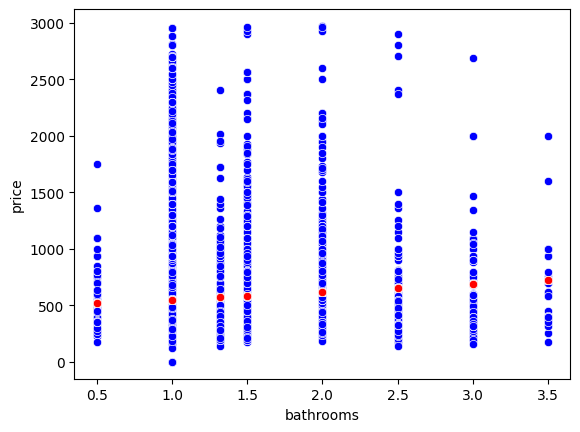

In [44]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='bathrooms',y='price',color='blue',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='red',data = df)

In [45]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0033250202831632825

In [46]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.057662988850416715

Review_scores_cleanliness vs price

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

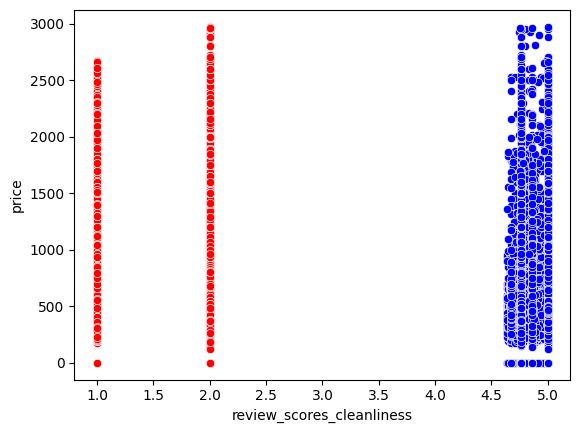

In [47]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)

In [48]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [50]:
type(model)

sklearn.linear_model._base.LinearRegression

In [51]:

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [52]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([196.75245901]),
 'rank_': 1,
 'singular_': array([9.43887568]),
 'intercept_': -393.4505183438647}

In [53]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0018118672000213554

In [54]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([543.09118653, 562.76643244, 574.57157998, ..., 543.09118653,
       543.09118653, 543.09118653])

In [55]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)
df

Predicciones3  Predicciones2  Predicciones   price  host_is_superhost  \
0        543.091187     551.497837    536.403592     0.0                  2   
1        562.766432     551.497837    621.616311   335.0                  1   
2        574.571580     586.195757    621.616311   384.0                  1   
3        584.409203     551.497837    536.403592   947.0                  2   
4        584.409203     551.497837    536.403592  1200.0                  2   
...             ...            ...           ...     ...                ...   
8688     543.091187     620.893678    536.403592   262.0                  2   
8689     543.091187     551.497837    621.616311   488.0                  1   
8690     543.091187     551.497837    536.403592  2800.0                  2   
8691     543.091187     551.497837    536.403592  2700.0                  2   
8692     543.091187     551.497837    536.403592  2600.0                  2   

      host_acceptance_rate  room_type  accommodates  bathrooms  \
0                     0.00          2           2.0        1.0   
1                     0.78          2           2.0        1.0   
2                     1.00          2           1.0        1.5   
3                     0.00          2           1.0        1.0   
4                     0.75          2           2.0        1.0   
...                    ...        ...           ...        ...   
8688                  0.00          2           2.0        2.0   
8689                  1.00          2           4.0        1.0   
8690                  1.00          2           2.0        1.0   
8691                  1.00          2           2.0        1.0   
8692                  1.00          2           2.0        1.0   

      review_scores_cleanliness  host_identity_verified  instant_bookable  
0                          4.76                       2                 2  
1                          4.86                       1                 2  
2                          4.92                       1                 2  
3                          4.97                       2                 2  
4                          4.97                       1                 2  
...                         ...                     ...               ...  
8688                       4.76                       1                 1  
8689                       4.76                       1                 1  
8690                       4.76                       1                 1  
8691                       4.76                       1                 1  
8692                       4.76                       1                 1  

[8693 rows x 12 columns]

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

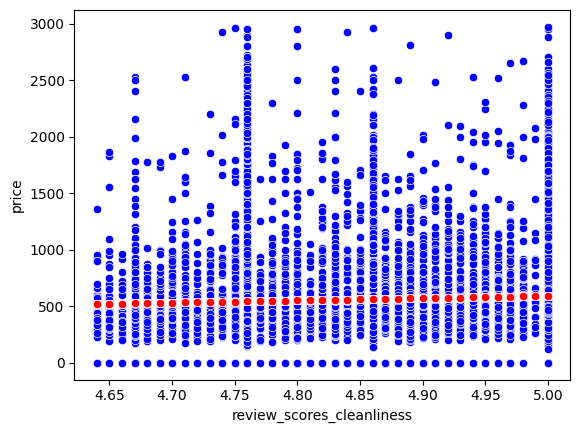

In [56]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='red',data = df)

In [57]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0018118672000213554

In [58]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.04256603340718225

preice vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

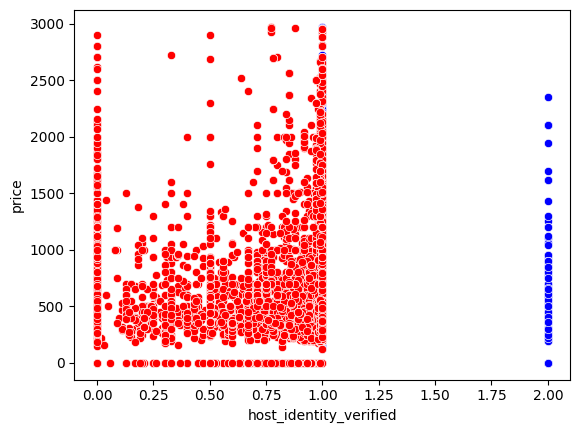

In [59]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

In [60]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [62]:
type(model)

sklearn.linear_model._base.LinearRegression

In [63]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [64]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-493.64190636]),
 'rank_': 1,
 'singular_': array([23.85192443]),
 'intercept_': 1090.5202506201588}

In [65]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.07283101863747832

In [66]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([103.23643791, 596.87834426, 596.87834426, ..., 596.87834426,
       596.87834426, 596.87834426])

In [67]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

Predicciones4  Predicciones3  Predicciones2  Predicciones   price  \
0        103.236438     543.091187     551.497837    536.403592     0.0   
1        596.878344     562.766432     551.497837    621.616311   335.0   
2        596.878344     574.571580     586.195757    621.616311   384.0   
3        103.236438     584.409203     551.497837    536.403592   947.0   
4        596.878344     584.409203     551.497837    536.403592  1200.0   
...             ...            ...            ...           ...     ...   
8688     596.878344     543.091187     620.893678    536.403592   262.0   
8689     596.878344     543.091187     551.497837    621.616311   488.0   
8690     596.878344     543.091187     551.497837    536.403592  2800.0   
8691     596.878344     543.091187     551.497837    536.403592  2700.0   
8692     596.878344     543.091187     551.497837    536.403592  2600.0   

      host_is_superhost  host_acceptance_rate  room_type  accommodates  \
0                     2                  0.00          2           2.0   
1                     1                  0.78          2           2.0   
2                     1                  1.00          2           1.0   
3                     2                  0.00          2           1.0   
4                     2                  0.75          2           2.0   
...                 ...                   ...        ...           ...   
8688                  2                  0.00          2           2.0   
8689                  1                  1.00          2           4.0   
8690                  2                  1.00          2           2.0   
8691                  2                  1.00          2           2.0   
8692                  2                  1.00          2           2.0   

      bathrooms  review_scores_cleanliness  host_identity_verified  \
0           1.0                       4.76                       2   
1           1.0                       4.86                       1   
2           1.5                       4.92                       1   
3           1.0                       4.97                       2   
4           1.0                       4.97                       1   
...         ...                        ...                     ...   
8688        2.0                       4.76                       1   
8689        1.0                       4.76                       1   
8690        1.0                       4.76                       1   
8691        1.0                       4.76                       1   
8692        1.0                       4.76                       1   

      instant_bookable  
0                    2  
1                    2  
2                    2  
3                    2  
4                    2  
...                ...  
8688                 1  
8689                 1  
8690                 1  
8691                 1  
8692                 1  

[8693 rows x 13 columns]

<Axes: xlabel='host_identity_verified', ylabel='price'>

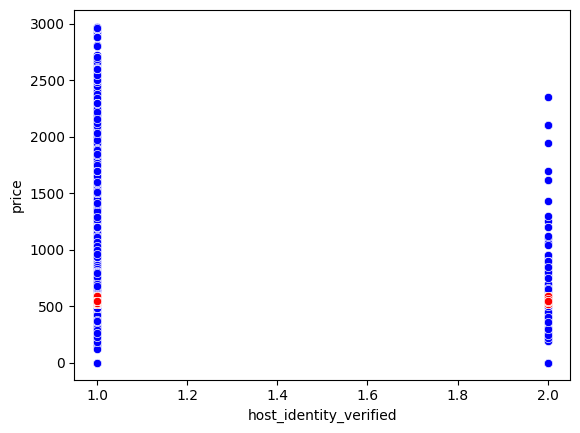

In [68]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_identity_verified',y='price',color='blue',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones3',color='red',data = df)

In [69]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.07283101863747832

In [70]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.2698722265026142

price vs instant bookable

<Axes: xlabel='instant_bookable', ylabel='price'>

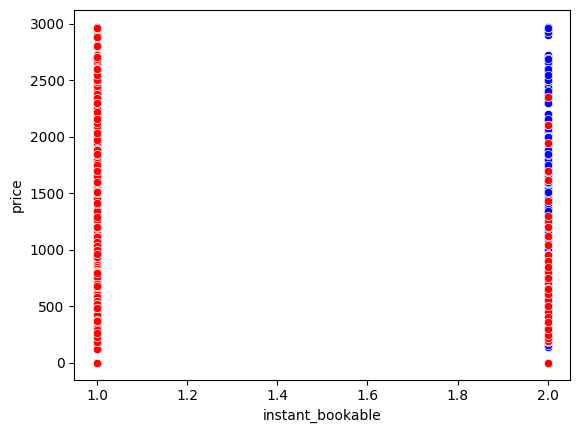

In [71]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [72]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [74]:
type(model)

sklearn.linear_model._base.LinearRegression

In [75]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [77]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-196.52095393]),
 'rank_': 1,
 'singular_': array([43.86528376]),
 'intercept_': 890.1725713243741}

In [78]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.03903957730237162

In [79]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([497.13066346, 497.13066346, 497.13066346, ..., 693.65161739,
       693.65161739, 693.65161739])

In [80]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

Predicciones5  Predicciones4  Predicciones3  Predicciones2  \
0        497.130663     103.236438     543.091187     551.497837   
1        497.130663     596.878344     562.766432     551.497837   
2        497.130663     596.878344     574.571580     586.195757   
3        497.130663     103.236438     584.409203     551.497837   
4        497.130663     596.878344     584.409203     551.497837   
...             ...            ...            ...            ...   
8688     693.651617     596.878344     543.091187     620.893678   
8689     693.651617     596.878344     543.091187     551.497837   
8690     693.651617     596.878344     543.091187     551.497837   
8691     693.651617     596.878344     543.091187     551.497837   
8692     693.651617     596.878344     543.091187     551.497837   

      Predicciones   price  host_is_superhost  host_acceptance_rate  \
0       536.403592     0.0                  2                  0.00   
1       621.616311   335.0                  1                  0.78   
2       621.616311   384.0                  1                  1.00   
3       536.403592   947.0                  2                  0.00   
4       536.403592  1200.0                  2                  0.75   
...            ...     ...                ...                   ...   
8688    536.403592   262.0                  2                  0.00   
8689    621.616311   488.0                  1                  1.00   
8690    536.403592  2800.0                  2                  1.00   
8691    536.403592  2700.0                  2                  1.00   
8692    536.403592  2600.0                  2                  1.00   

      room_type  accommodates  bathrooms  review_scores_cleanliness  \
0             2           2.0        1.0                       4.76   
1             2           2.0        1.0                       4.86   
2             2           1.0        1.5                       4.92   
3             2           1.0        1.0                       4.97   
4             2           2.0        1.0                       4.97   
...         ...           ...        ...                        ...   
8688          2           2.0        2.0                       4.76   
8689          2           4.0        1.0                       4.76   
8690          2           2.0        1.0                       4.76   
8691          2           2.0        1.0                       4.76   
8692          2           2.0        1.0                       4.76   

      host_identity_verified  instant_bookable  
0                          2                 2  
1                          1                 2  
2                          1                 2  
3                          2                 2  
4                          1                 2  
...                      ...               ...  
8688                       1                 1  
8689                       1                 1  
8690                       1                 1  
8691                       1                 1  
8692                       1                 1  

[8693 rows x 14 columns]

<Axes: xlabel='instant_bookable', ylabel='price'>

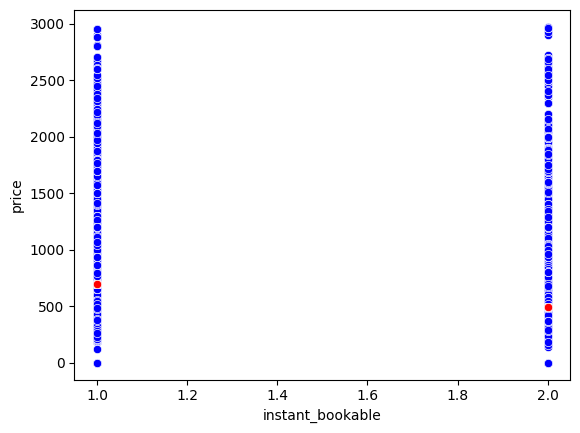

In [81]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

In [82]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.03903957730237162

In [83]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.19758435490284046